# Biomedical Datasciencce Homework 2

### Source:

The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders.


### Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. 

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (littlem '@' robots.ox.ac.uk). 

Further details are contained in the following reference -- if you use this dataset, please cite: 
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).


### Attribute Information:

Matrix column entries (attributes): <br\>
name - ASCII subject name and recording number  <br\>
MDVP:Fo(Hz) - Average vocal fundamental frequency  <br\>
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency  <br\>
MDVP:Flo(Hz) - Minimum vocal fundamental frequency  <br\>
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency  <br\>
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude  <br\>
NHR,HNR - Two measures of ratio of noise to tonal components in the voice  <br\>
status - Health status of the subject (one) - Parkinson's, (zero) - healthy  <br\>
RPDE,D2 - Two nonlinear dynamical complexity measures  <br\>
DFA - Signal fractal scaling exponent  <br\>
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation  <br\>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
Dataset = pd.read_csv('data.csv')
Features = Dataset.drop(['name','status'],axis=1)
Labels = Dataset['status']

## Data Split
Split the data into Training and Testing using Hold-out method. The test dataset contain 20% of the data. 

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2, random_state=3)
print(X_train)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
179      148.143       155.982       135.041         0.00392   
139      116.150       131.731       109.815         0.00381   
121      176.824       215.293        83.961         0.00460   
114      206.327       226.355        92.020         0.00495   
30       197.076       206.896       192.055         0.00289   
61       223.365       238.987        98.664         0.00264   
98       125.791       140.557        96.206         0.01378   
118      178.285       442.824        82.063         0.00462   
168      197.569       217.627        90.794         0.00803   
78        95.385       102.145        90.264         0.00608   
128      119.031       127.533       109.216         0.00440   
174      117.004       144.466        99.923         0.00353   
164      102.273       142.830        85.902         0.00907   
133      118.747       123.723       109.836         0.00331   
13       139.173       179.139        76

## Build Classifier (Pipeline)
Base on the information from **X_train**, it seems that we need to standardize all features before we do classification. Then we define the parameter to be n_neighbors and test the range from 4 neighbours to 10 neighbours. This is defined by the homework problem #2.  

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

processFlow = Pipeline([('zscore', StandardScaler()),
                       ('kNN', KNeighborsClassifier())])

paramRange = [4,5,6,7,8,9,10]
paramGrid = [{'kNN__n_neighbors': paramRange}]

gridCV = GridSearchCV(estimator=processFlow, 
                  param_grid=paramGrid, 
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=1)

gridCV.fit(X_train, y_train)
print(gridCV.best_score_)
print(gridCV.best_params_)

0.910256410256
{'kNN__n_neighbors': 4}


## Plot Validation Curve
The validation curve is a visual display of the validation accuracy in terms of the GridSearch parameter range. We can visaulize how each parameter compared to each other as opposed to simple number. 

D:\Users\jcagle\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Users\jcagle\Anaconda3\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


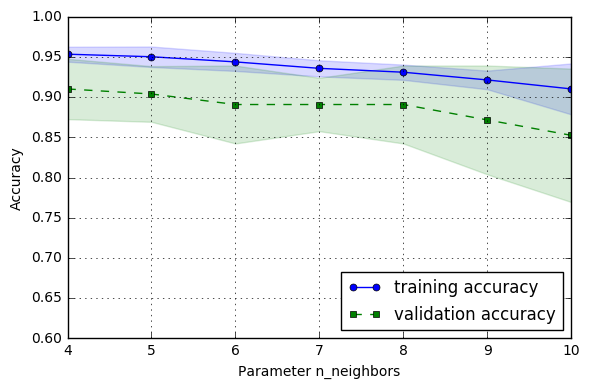

In [5]:
from sklearn.learning_curve import validation_curve


train_scores, test_scores = validation_curve(
                estimator=processFlow, 
                X=X_train, 
                y=y_train, 
                param_name='kNN__n_neighbors', 
                param_range=paramRange,
                cv=5,
                n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(paramRange, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(paramRange, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(paramRange, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(paramRange, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.xlim([4, 10])
plt.tight_layout()
plt.show()

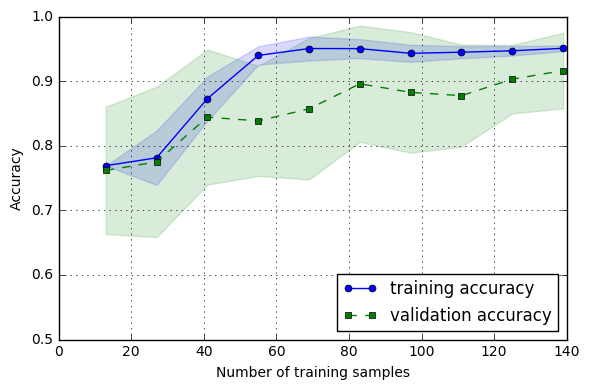

In [6]:
from sklearn.learning_curve import learning_curve

pipekNN = Pipeline([('zscore', StandardScaler()),
                   ('kNN', KNeighborsClassifier(n_neighbors=gridCV.best_params_['kNN__n_neighbors']))])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipekNN, 
                                                        X=X_train, 
                                                        y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        cv=10,
                                                        n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

## Test the model on Testing Dataset
Train the model on all training dataset, and then perform testing on the testing dataset. The result will be displayed in a Confusion Matrix. 

In [7]:
from sklearn.metrics import confusion_matrix
import itertools

pipekNN.fit(X_train, y_train)
predictedOutput = pipekNN.predict(X_test)

cm = confusion_matrix(y_test, predictedOutput)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

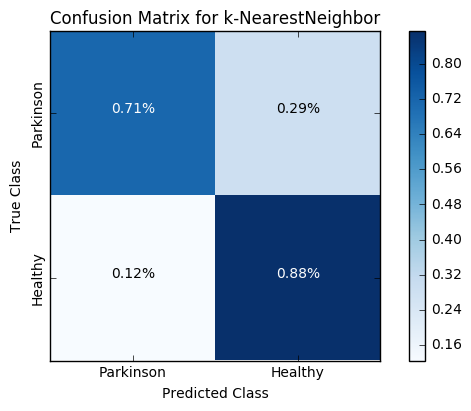

In [8]:
plt.clf()
plt.imshow(cm,interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for k-NearestNeighbor')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Parkinson','Healthy'])
plt.yticks(tick_marks, ['Parkinson','Healthy'], rotation=90)
threshold = cm.max() / 2.

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,"%.2f%%" % (cm[i,j]),horizontalalignment='center',color="white" if cm[i,j] > threshold else "black")

plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Extra

The reason that I include this in extra is because the following analysis deviated from the Homework instruction. The only change made to the following code is that I use a param_range from 1 to 10 instead of 4 to 10. This is because the best parameter found by cross-validation is 4, this is exactly on the minimum limit of the range, which is a very sketchy location that make people doubt it to be the true optimal parameter. The optimal is only shown if we can show a concave down (bell shape) with peak at the n_neighhbor = 4. Hopefully with new range from 1 to 10, we can clearly see an increase and decrease in terms of validation accuracy.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

processFlow = Pipeline([('zscore', StandardScaler()),
                       ('kNN', KNeighborsClassifier())])

paramRange = [1,2,3,4,5,6,7,8,9,10]
paramGrid = [{'kNN__n_neighbors': paramRange}]

gridCV = GridSearchCV(estimator=processFlow, 
                  param_grid=paramGrid, 
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=1)

gridCV.fit(X_train, y_train)
print(gridCV.best_score_)
print(gridCV.best_params_)

0.935897435897
{'kNN__n_neighbors': 3}


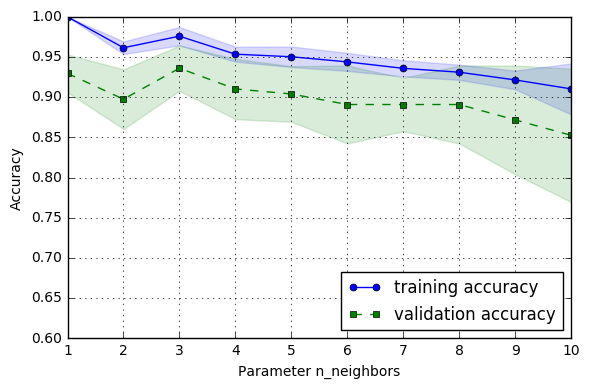

In [10]:
from sklearn.learning_curve import validation_curve


train_scores, test_scores = validation_curve(
                estimator=processFlow, 
                X=X_train, 
                y=y_train, 
                param_name='kNN__n_neighbors', 
                param_range=paramRange,
                cv=5,
                n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(paramRange, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(paramRange, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(paramRange, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(paramRange, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.xlim([1, 10])
plt.tight_layout()
plt.show()

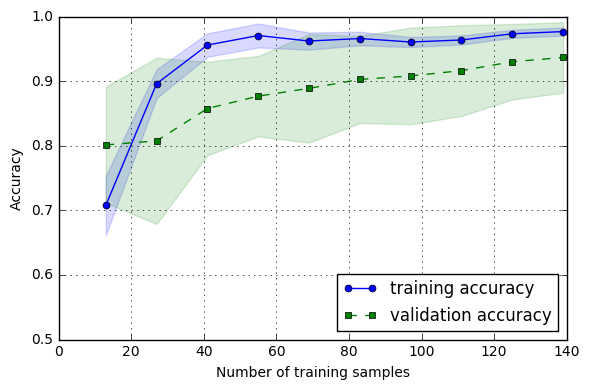

In [11]:
from sklearn.learning_curve import learning_curve

pipekNN = Pipeline([('zscore', StandardScaler()),
                   ('kNN', KNeighborsClassifier(n_neighbors=gridCV.best_params_['kNN__n_neighbors']))])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipekNN, 
                                                        X=X_train, 
                                                        y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        cv=10,
                                                        n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
import itertools

pipekNN.fit(X_train, y_train)
predictedOutput = pipekNN.predict(X_test)

cm = confusion_matrix(y_test, predictedOutput)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

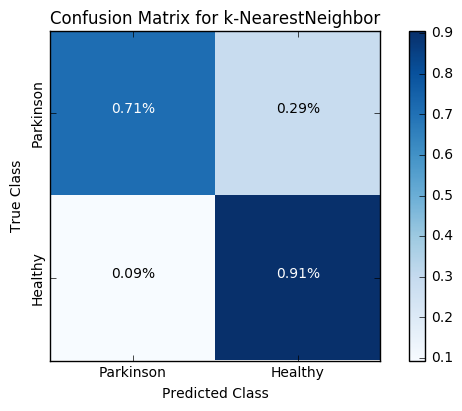

In [13]:
plt.clf()
plt.imshow(cm,interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for k-NearestNeighbor')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Parkinson','Healthy'])
plt.yticks(tick_marks, ['Parkinson','Healthy'], rotation=90)
threshold = cm.max() / 2.

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,"%.2f%%" % (cm[i,j]),horizontalalignment='center',color="white" if cm[i,j] > threshold else "black")

plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Base on this analysis. We can see that with **parameter = 3**, we achive higher prediction accuracy for Healthy datapoint and lower false positive. However, not much change occur for the false negative problem. 